In [2]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [5]:
dates = []
prices = []

def read_csv(fn):
    with open(fn, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

def predict(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_ploy = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin.fit(dates,prices)
    svr_ploy.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    # graphy
    plt.scatter(dates,prices,color='black',label='Data')
    plt.plot(dates,svr_lin.predict(dates), color='red', label='Linear model')
    plt.plot(dates,svr_ploy.predict(dates), color='green', label='Polynomial model')
    plt.plot(dates,svr_rbf.predict(dates), color='blue', label='RBF model')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("SVR")
    plt.legend()
    plt.show()
    
    return


In [12]:
def predict(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_rbf.fit(dates, prices)
    # graph it
    plt.scatter(dates,prices,color='black',label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='blue', label='RBF model')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("SVR-RBF")
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0]
    

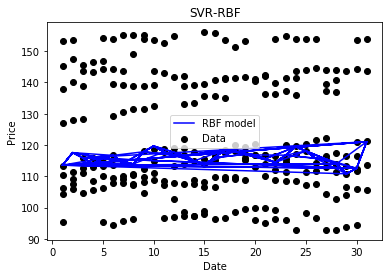

110.812009616


In [15]:
read_csv("./aapl.csv")
pred_price = predict(dates, prices, 29)
print(pred_price)